In [3]:
import sys
sys.path.append('../Class')
sys.path.append('../utils')
%matplotlib inline
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
from loss import MSELoss
from lineaire import Linear
from mltools import gen_arti, plot_frontiere, plot_data


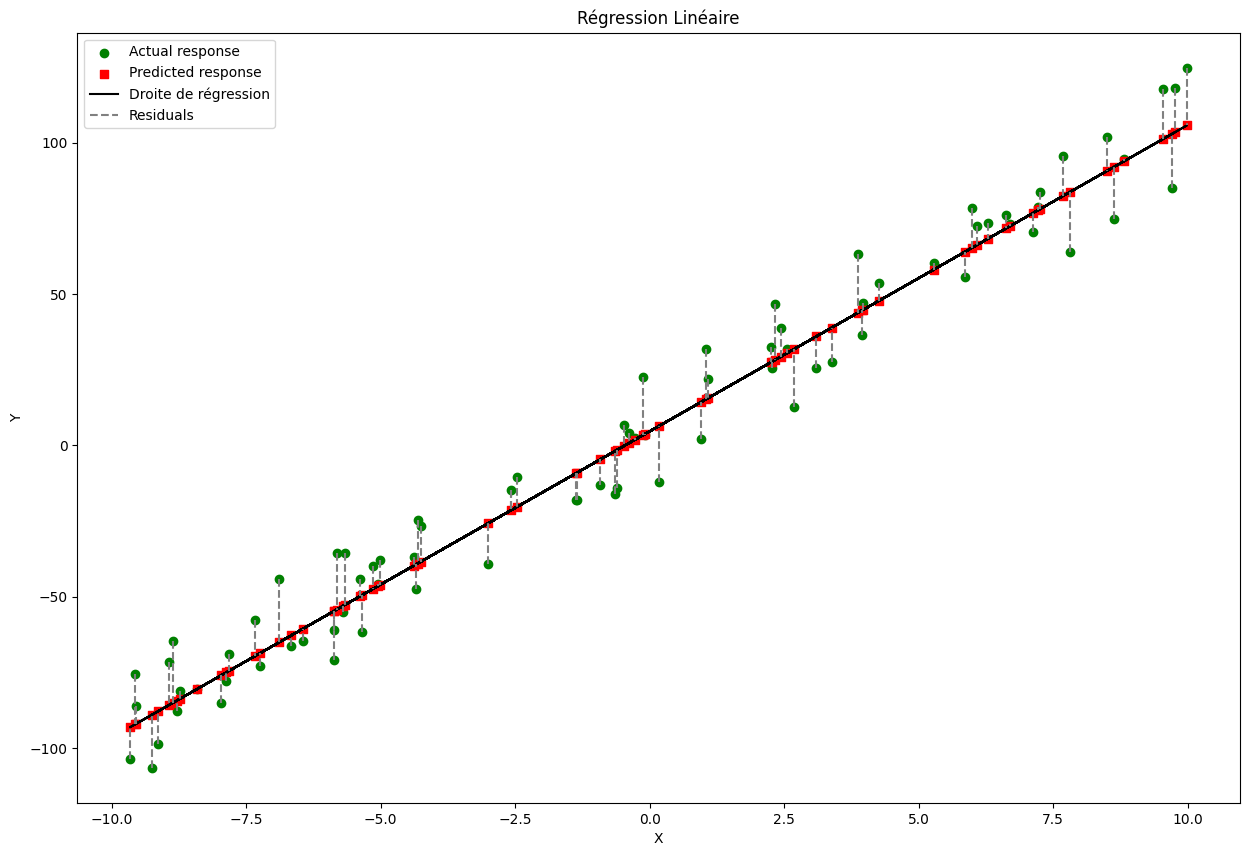

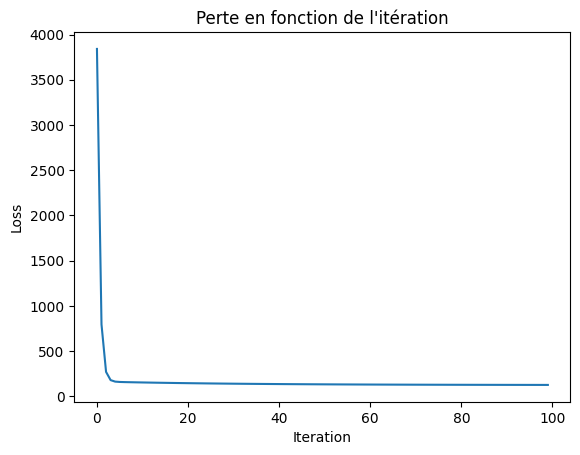

In [4]:
# Régression linéaire 


# Génération de données aléatoires
d = 1
X = np.random.uniform(-10, 10, 80).reshape((-1, 1))
y = 10 * X + 5 + (np.random.uniform(-20, 20, 80).reshape((-1, 1)))

## Régression linéaire
### Paramètres
iter = 100
learning_rate = 1e-4
loss = MSELoss()
model = Linear(1, d)

### Algorithme
losses = []
for _ in range(iter):
    # forward
    hidden = model.forward(X)
    # backward
    losses.append(loss.forward(y, hidden).mean())
    loss_back = loss.backward(y, hidden)
    delta_linear = model.backward_delta(X, loss_back)
    model.backward_update_gradient(X, loss_back)
    model.update_parameters(learning_rate=learning_rate)
    model.zero_grad()

plt.figure(figsize=(15, 10))

# Tracer les données et la droite de régression
plt.scatter(X, y, label='Actual response', color='green', marker='o')
plt.scatter(X, model.forward(X), label='Predicted response', color='red', marker='s')
plt.plot(X, model.forward(X), label='Droite de régression', color='black')

# Tracer les résidus
for i in range(len(X)):
    x_value = X[i]  # Convertir le tensor en valeur scalaire
    y_real = y[i]
    y_ = model.forward(X)[i]
    plt.plot([x_value, x_value], [y_real, y_], color='grey', linestyle='dashed')

    if i == 0:
        plt.plot([x_value, x_value], [y_real, y_], color='grey', linestyle='dashed', label='Residuals')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Régression Linéaire')
plt.legend()
plt.show()

# Tracer la perte
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Perte en fonction de l\'itération')
plt.show()


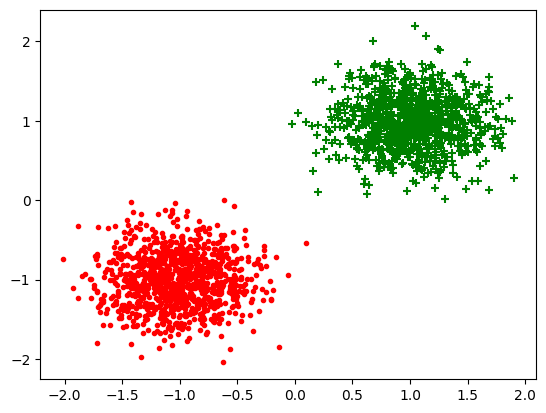

In [5]:
x_train, y_train = gen_arti(nbex=2000, data_type=0, epsilon=0.1)
x_test, y_test = gen_arti(nbex=2000, data_type=0, epsilon=0.4)
n = x_train.shape[1]
d = 1
y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))
plot_data(x_train, y_train)
plt.show()

Accuracy en train : 1.0
Accuracy en test : 0.997


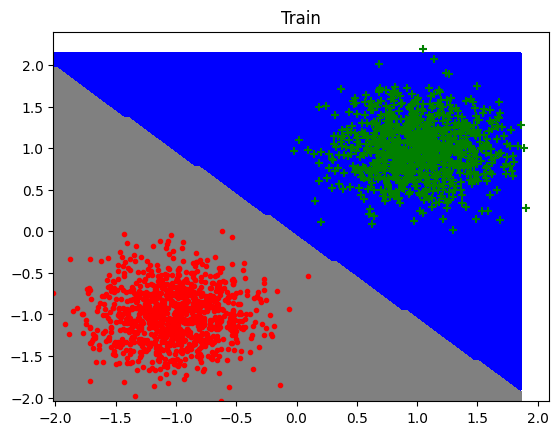

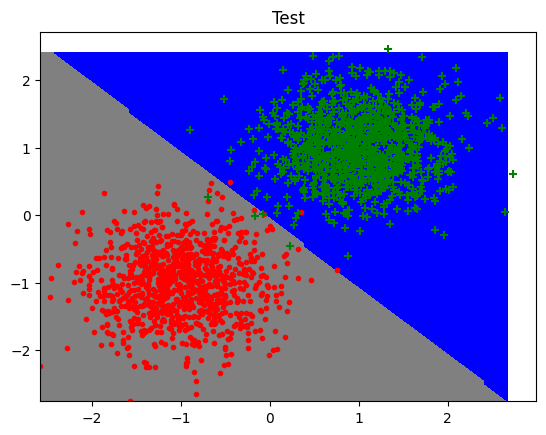

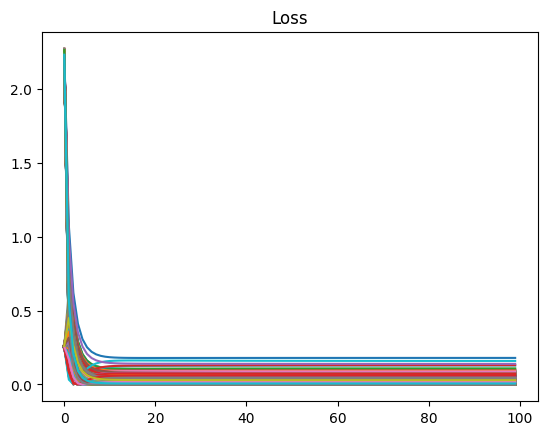

In [8]:
nb_itr = 100
learning_rate = 1e-4
loss = MSELoss()
lineaire = Linear(n, d)
all_loss = [] 


for i in range(nb_itr):
    # forward
    z = lineaire.forward(x_train)
    current_loss = loss.forward(y_train, z)
    all_loss.append(current_loss)

    # backward
    loss_back = loss.backward(y_train, z)
    delta = lineaire.backward_delta(x_train, loss_back)
    # on a que 1 couche donc on peut directement mettre à jour les paramètres en utilisant loss_back
    lineaire.backward_update_gradient(x_train, loss_back)
    lineaire.update_parameters(learning_rate)
    lineaire.zero_grad()

def predict(x):
    return np.where(lineaire.forward(x) > 0.5, 1, 0)
    

acc_train = (y_train == predict(x_train)).mean()
acc_test = (y_test == predict(x_test)).mean()
print(f"Accuracy en train : {acc_train}")
print(f"Accuracy en test : {acc_test}")


plot_frontiere(x_train, predict, step=100)
plot_data(x_train, y_train.reshape(-1,1))
plt.title("Train")
plt.show()

plot_frontiere(x_test, predict, step=100)
plot_data(x_test, y_test.reshape(-1,1))
plt.title("Test")
plt.show()

plt.plot(all_loss)
plt.title("Loss")
plt.show()

